In [148]:
import pandas as pd
import numpy as np
from urllib.parse import urlencode
import requests
import json
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway, norm, mannwhitneyu, chi2_contingency, shapiro, f
import os
from tqdm.auto import tqdm
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [149]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
test = 'https://disk.yandex.ru/d/4XXIME4osGrMRA'
test_control = 'https://disk.yandex.ru/d/yJFydMNNGkEKfg'
test_control_2 = 'https://disk.yandex.ru/d/br6KkQupzzTGoQ'
transactions_test = 'https://disk.yandex.ru/d/gvCWpZ55ODzs2g'
transactions_control_1 = 'https://disk.yandex.ru/d/VY5W0keMX5TZBQ'
transactions_control_2 = 'https://disk.yandex.ru/d/th5GL0mGOc-qzg'
final_url = base_url + urlencode(dict(public_key=test)) 
df_test = pd.read_csv(requests.get(final_url).json()['href'], sep = ';')
final_url_1 = base_url + urlencode(dict(public_key=test_control)) 
df_control_1 = pd.read_csv(requests.get(final_url_1).json()['href'], sep = ';')
final_url_2 = base_url + urlencode(dict(public_key=test_control_2)) 
df_control_2 = pd.read_csv(requests.get(final_url_2).json()['href'], sep = ';')

final_url_3 = base_url + urlencode(dict(public_key=transactions_test)) 
df_test_transactions = pd.read_csv(requests.get(final_url_3).json()['href'], sep = ';')
final_url_4 = base_url + urlencode(dict(public_key=transactions_control_1)) 
df_control_1_transactions = pd.read_csv(requests.get(final_url_4).json()['href'], sep = ';')
final_url_5 = base_url + urlencode(dict(public_key=transactions_control_2)) 
df_control_2_transactions = pd.read_csv(requests.get(final_url_5).json()['href'], sep = ';')

 Для предварительной оценки, посмотрим на структуру датафреймов, количество строк, столбцов и типы данных представленных в них.
    

In [150]:
df_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [151]:
df_test.shape

(4308, 13)

In [152]:
df_test.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [153]:
df_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [154]:
df_control_1.shape

(4340, 13)

In [155]:
df_control_1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [156]:
df_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [157]:
df_control_2.shape

(4264, 13)

In [158]:
df_control_2.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [159]:
df_test_transactions

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type


In [160]:
df_control_1_transactions

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [161]:
df_control_1_transactions.uid.isnull().sum()

630

In [162]:
df_control_2_transactions

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial
...,...,...,...,...,...,...,...,...
323,891985866,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640,147,trial_vip_popup,trial_premium
324,891491145,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727,147,send_message,trial_premium
325,892053750,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261,19,autorefill,coins
326,891668253,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997,147,trial_vip_popup,trial_premium


In [163]:
df_control_1_transactions.uid.isnull().sum()

630

Предварительно оценив данные можно сделать выводы и составить план дальнейшей работы:  
    Можно отметить, что наличие 2-ух контрольных групп, позволяет нам перед тем как вровести А/B тесты, 
проверить правильность системы сплитования.  
**Для оценки успешности проведенного эксперемента нам необходимо будет:**  
      
    1.Определить ключевые метрики по которым будем проводить A/B тест.
    2.Предобработать данные
    3.Проверить корректность работы системы сплитования.  
    4.Провести A/B тест тестовой и контрольной группы.  

**Определение метрик:**

Так как у нас дейтинговое приложение, для оценки эффективности проведенного эксперемента и проверки корректности 
    работы системы сплитования мы будем пользоваться следующими метриками:  
    1.ARPU (Average Revenue per User) — это метрика, которая показывает среднюю выручку на одного активного пользователя продукта  
    2.ARPPU (Average Revenue Per Paying User) - это метрика, кокторая паказвает среднюю выручку на одного платящего пользователя.  
    3.Конверсия пользователя с бесплатной подпиской в обладателя платного премиум-аккаунта  
    4.Конверсия пользователя из владельца пробной подписки в обладателя платной подписки премиум аккаунта


 ### Проведем предобработку данных таблиц c данными о пользователях  
 Для удобства объеденим данные в одну таблицу, но перед эти создадим колонку с обозначением к какой группе принадлежат данные 


In [164]:
df_test['data'] = 'test'
df_control_1['data'] = 'control_1'
df_control_2['data'] = 'control_2'

In [165]:
df = pd.concat([df_test, df_control_1, df_control_2])

In [166]:
df.data.value_counts()

control_1    4340
test         4308
control_2    4264
Name: data, dtype: int64

In [167]:
print(df_test.shape, df_control_1.shape, df_control_2.shape)

(4308, 14) (4340, 14) (4264, 14)


Как можно увидеть, что все отработало корректно

In [168]:
df.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
data                 object
dtype: object

In [169]:
df.visit_days = df.visit_days.astype(str)

 Так же созданим колонку с информацией о общем количестве дней посещений пользователем нашей платформы


In [170]:
df['all_days'] = df.visit_days.apply(lambda x: len(x.split(',')) if x != 'nan' else 0)

In [171]:
df.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,data,all_days
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,test,14
1,892044516,27,0,NaN,Germany,nan,1,24,30,0,NaN,NaN,0,test,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0,test,20
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0,test,12
4,891406035,27,1000,NaN,France,nan,1,24,30,1,1.0,NaN,0,test,0


Для анализа данных полезным будет создать колонку с информацией о том, был ли хоть раз у пользователя премиум. Обратим внимание на то, что если пользователь является премиумом на данный момент, то это означает, что у него в колонке was_premium будет единица. Для дальнейшего анализа для нас не является важным, имеется ли премиум сейчас, так что данную колонку можно удалить, а was_premium переименовать в premium и заполнить пропуски нулями

In [172]:
df = df.rename(columns={'was_premium': 'premium'})
df['premium'] = df['premium'].fillna(0)

In [173]:
df = df.drop('is_premium',  axis= 1)

In [174]:
df.isnull().sum() # Проверим на наличие пустых значений в данных

uid                     0
age                     0
attraction_coeff        0
coins               12742
country                 0
visit_days              0
gender                  0
age_filter_start        0
age_filter_end          0
views_count             0
premium                 0
total_revenue           0
data                    0
all_days                0
dtype: int64

In [175]:
# Заменим пустые значения на на 0
df = df.fillna(0)

In [176]:
df.isnull().sum()

uid                 0
age                 0
attraction_coeff    0
coins               0
country             0
visit_days          0
gender              0
age_filter_start    0
age_filter_end      0
views_count         0
premium             0
total_revenue       0
data                0
all_days            0
dtype: int64

Так же проверим на дублирование пользователей

In [177]:
df.groupby('uid').agg({'data': 'count'}).max() 

data    1
dtype: int64

Как можно заметить дублирование пользователей не наблюдается

**На платформе присутствуют 3 типа пользователей:**  

Те, кто приобретал платную подписку  
Те, кто только лишь использовал пробную версию, не купив платную  
Те, кто не платил деньги и не пробовал пробную версию  
Создадим колонку с информацией о типе пользователя. 1 категория - payer, 2 категория - probe, 3 категория - free

In [178]:
def type_user(premium, revenue):
    if premium == 1 and revenue > 0:
        return 'bought'
    elif premium == 1 and revenue == 0:
        return 'probe'
    else:
        return 'free'

In [179]:
df['type_type'] = df.apply(lambda x: type_user(x.premium, x.total_revenue), axis = 1)

In [180]:
df.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,premium,total_revenue,data,all_days,type_type
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0,test,14,free
1,892044516,27,0,0.0,Germany,nan,1,24,30,0,0.0,0,test,0,free
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0,test,20,free
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0,test,12,free
4,891406035,27,1000,0.0,France,nan,1,24,30,1,1.0,0,test,0,probe


Стоит обратить внимание на условие: "Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней." То есть стоит взять пользователей из тех стран, которые были только в тесте. 

In [181]:
df_3 = df.groupby(['country', 'data'], as_index=False).agg({'uid': 'count'}).rename(columns = {'uid': 'amount'})
pivot = df_3.pivot_table(index = 'country', columns='data', values='amount', fill_value=0).reset_index()
pivot.head()

data,country,control_1,control_2,test
0,Algeria,2,0,2
1,Argentina,389,397,396
2,Armenia,1,0,0
3,Australia,50,51,62
4,Austria,0,2,0


In [182]:
wer = list(pivot.query('control_1 != 0 and control_2 != 0 and test != 0').country)

In [183]:
df = df.query('country in @wer')

### Предобработаем данные с информацией по платежам  
 
 Объеденим таблицы с данными по транзакциям пользователей в одну, таким же образом как и таблицы с данными по пользователям

In [184]:
df_test_transactions['data'] = 'test'
df_control_1_transactions['data'] = 'control_1'
df_control_2_transactions['data'] = 'control_2'

In [185]:
df_transact = pd.concat([df_test_transactions, df_control_1_transactions, df_control_2_transactions])

In [186]:
df_transact

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,data
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test
...,...,...,...,...,...,...,...,...,...
323,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,control_2
324,891491145.0,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727.0,147.0,send_message,trial_premium,control_2
325,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261.0,19.0,autorefill,coins,control_2
326,891668253.0,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997.0,147.0,trial_vip_popup,trial_premium,control_2


In [187]:
df_transact.data.value_counts() # Проверим на кооректоность при объединении и что данные не потерялись

control_1    1007
control_2     328
test          273
Name: data, dtype: int64

In [188]:
df_transact.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
data             object
dtype: object

Изменим тип данных в колонках с информацией о времени

In [189]:
df_transact.joined_at = pd.to_datetime(df_transact.joined_at)
df_transact.paid_at = pd.to_datetime(df_transact.paid_at)

In [190]:
df_transact.dtypes

uid                    float64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                float64
payment_id             float64
from_page               object
product_type            object
data                    object
dtype: object

 Уберем 0 в конце у номера id  пользователя для дальнейшего кореектоного присоединения информации о платежах   к информации о пользователях


In [191]:
df_transact.uid = df_transact.uid.astype(str)
df_transact.uid = df_transact.uid.apply(lambda x: x.split('.')[0])


In [192]:
df_transact.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,data
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test


In [193]:
df_transact.uid.value_counts()

nan          630
892333905     27
892236423     14
892069554     11
891637005     11
            ... 
892106949      1
891414915      1
891555327      1
891482937      1
891651711      1
Name: uid, Length: 527, dtype: int64

 Можем увидеть что данные в чтолбце с id дублируется по несколько раз и  присоединение этой таблицы к таблице с данными о пользователях будет не корректной   
 Будем использовать эту таблиц для оценки изменнений метрик во времени

In [194]:
df_transact = df_transact.dropna (how='all') # Удалим стро

In [195]:
df_transact.uid.value_counts()

nan          630
892333905     27
892236423     14
892069554     11
891637005     11
            ... 
892106949      1
891414915      1
891555327      1
891482937      1
891651711      1
Name: uid, Length: 527, dtype: int64

In [196]:
df_transact = df_transact.query('uid != "nan"')

In [197]:
df_transact.uid.value_counts()

892333905    27
892236423    14
892069554    11
891637005    11
891707061    10
             ..
892385232     1
892085121     1
892026636     1
891897387     1
891459291     1
Name: uid, Length: 526, dtype: int64

Посмотрим на присоединение пользователей во времени

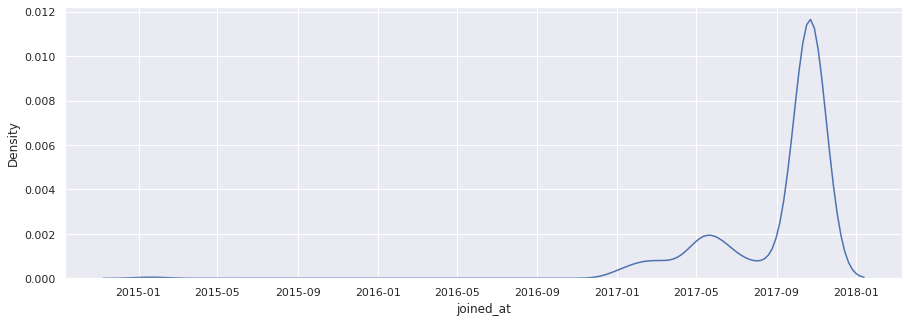

In [198]:
sns.set(rc={'figure.figsize': (15, 5)})
sns.kdeplot(data = df_transact, x = df_transact.joined_at)

In [199]:
df_transact.joined_at.sort_values()

65    2015-01-19 11:49:00
101   2015-01-19 11:49:00
224   2015-01-19 11:49:00
196   2017-01-11 01:06:00
342   2017-01-11 01:06:00
              ...        
138   2017-10-31 17:43:00
293   2017-10-31 17:51:00
265   2017-10-31 20:40:00
147   2017-10-31 22:17:00
136   2017-10-31 23:40:00
Name: joined_at, Length: 978, dtype: datetime64[ns]

In [200]:
df_transact.query('joined_at == "2015-01-19 11:49:00"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,data
65,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type,control_1
101,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type,control_1
224,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type,control_1


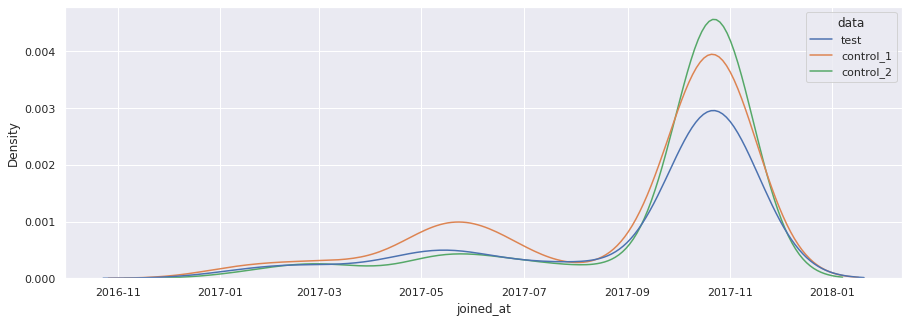

In [201]:
sns.kdeplot(data=df_transact.query('joined_at > "2016-12-01"'), x="joined_at",
            color = 'r', hue = 'data')

Для получения корректных результатов эксперимента их следует убрать.

In [202]:
df_transact = df_transact.query('joined_at != "2015-01-19 11:49:00"')

In [203]:
df_transact.query('joined_at > paid_at')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,data
11,891861048,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588.0,68.0,none,premium_no_trial,test
20,891806280,United States of America,2017-10-27 08:56:00,2017-03-11 10:57:00,8242.0,147.0,trial_vip_popup,trial_premium,test
24,891786216,Spain,2017-10-27 18:20:00,2017-03-11 20:20:00,12818.0,147.0,trial_vip_popup,trial_premium,test
25,892057347,France,2017-10-21 23:15:00,2017-08-11 01:56:00,1209.0,19.0,none,coins,test
36,891589239,Italy,2017-10-31 14:16:00,2017-09-11 15:44:00,6305.0,19.0,empty_likes,coins,test
...,...,...,...,...,...,...,...,...,...
305,891606141,United States of America,2017-10-31 04:43:00,2017-03-11 21:13:00,3783.0,67.0,empty_likes,other_type,control_2
313,891691062,Belgium,2017-10-29 16:19:00,2017-05-11 18:35:00,16614.0,147.0,popular_users_block,trial_premium,control_2
314,892075512,United States of America,2017-10-21 16:58:00,2017-08-11 12:18:00,9958.0,147.0,trial_vip_popup,trial_premium,control_2
315,891722802,United States of America,2017-10-29 02:08:00,2017-05-11 05:49:00,12727.0,147.0,trial_vip_popup,trial_premium,control_2


Можно заметить странное явление. Дата оплаты за подписку у пользователя раньше даты регистрации, что в принципе не возможно. Такие данные могут быть вызваны ошибкой в системе и их следует убрать.

In [204]:
df_transact = df_transact.drop(df_transact[df_transact['joined_at'] > df_transact['paid_at']].index)


Стоит обратить внимание на условие: "Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней." То есть стоит взять пользователей из тех стран, которые были только в тесте. 

In [205]:
df_transact_2 = df_transact.groupby(['country', 'data'], as_index=False).agg({'uid': 'count'}).rename(columns = {'uid': 'amount'})
pivot = df_3.pivot_table(index = 'country', columns='data', values='amount', fill_value=0).reset_index()
pivot.head()

data,country,control_1,control_2,test
0,Algeria,2,0,2
1,Argentina,389,397,396
2,Armenia,1,0,0
3,Australia,50,51,62
4,Austria,0,2,0


In [206]:
wer_1 = list(pivot.query('control_1 != 0 and control_2 != 0 and test != 0').country)

In [207]:
df_transact = df_transact.query('country in @wer_1')

  <h2> Оценка системы сплитования

Посмотрим на распределение пользователей по полу

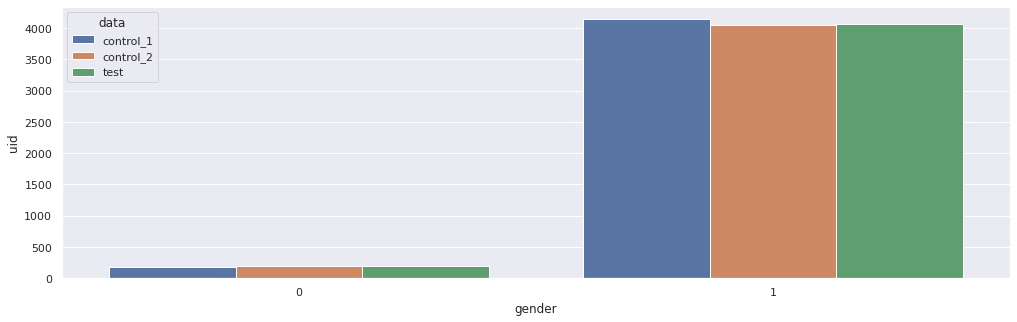

In [208]:
sns.set(rc={'figure.figsize': (17, 5)})
df_1 =df.groupby(['gender', 'data'], as_index=False).agg({'uid': 'count'})
sns.barplot(data=df_1, x="gender", y='uid', hue="data")   
plt.show()

Посмотрим на распределние пользователей по странам

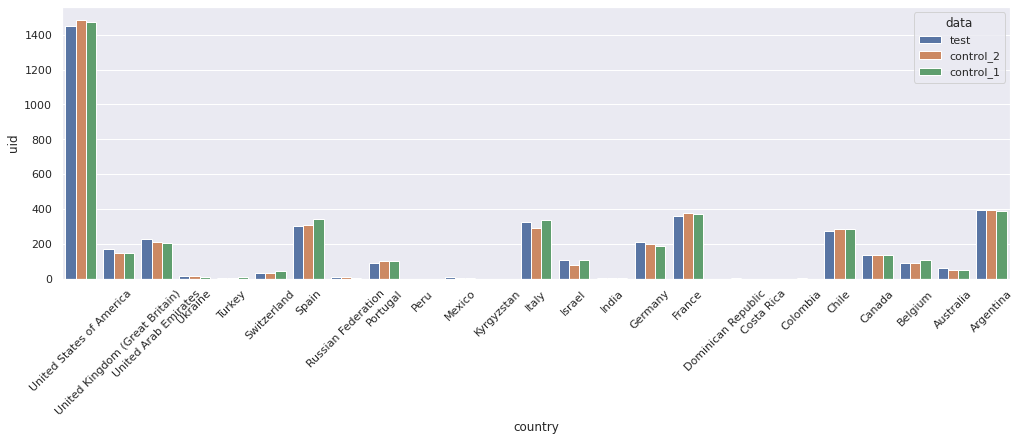

In [209]:
sns.set(rc={'figure.figsize': (17, 5)})
df_2 = df.groupby(['country', 'data'], as_index=False).agg({'uid': 'count'}).sort_values('country', ascending = False)
sns.barplot(data=df_2, x="country", y='uid', hue="data") 
plt.xticks(rotation=45)
plt.show()

 Можно сделать выводы, что пользователи распределны нормально по полу и странам

**Проверим систему сплитования сравнив контрольные группы по предложенным метрикам**

1. ARPU (Average revenue per user) - для оценки средней выручки одного пользователя

Данную метрику будем проверять с помощью синтетических симуляций 1000 раз

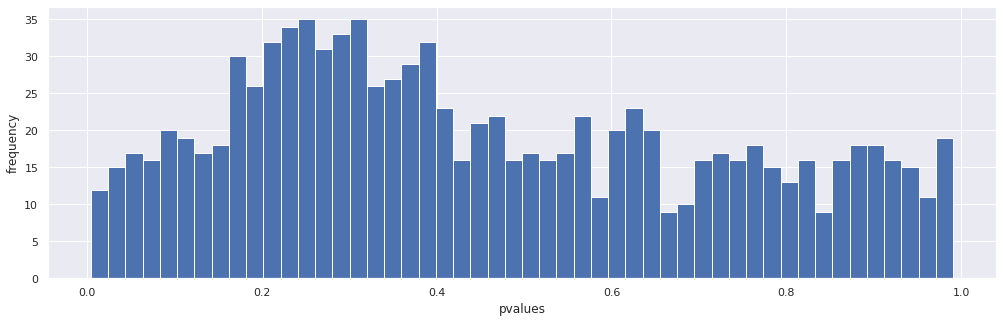

In [210]:
simulations = 1000 # число симуляций
n_s = 800 # число элементов, берущихся из выборки для проведения единичного t теста
res = []

d0 = df.query('data == "control_1"').total_revenue
d1 = df.query('data == "control_2"').total_revenue

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = d0.sample(n_s, replace=False).values
    s2 = d1.sample(n_s, replace=False).values
    res.append(stats.ttest_ind(s1, s2, equal_var=False)[1]) # сохраняем pvalue

plt.hist(res, bins=50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')

plt.show()

In [211]:
# Проверяем, что количество ложноположительных случаев не превышает альфа = 0.05
sum(np.array(res) < 0.05) / simulations

0.032

In [212]:
print('ARPU control_1 =', round(df.query('data == "control_1"').total_revenue.mean(), 3))

ARPU control_1 = 597.654


In [213]:
print('ARPU control_2 =', round(df.query('data == "control_2"').total_revenue.mean(), 3))

ARPU control_2 = 447.264


2. ARPPU (Average revenue per paying user) - для оценки средней выручки одного платящих пользователей

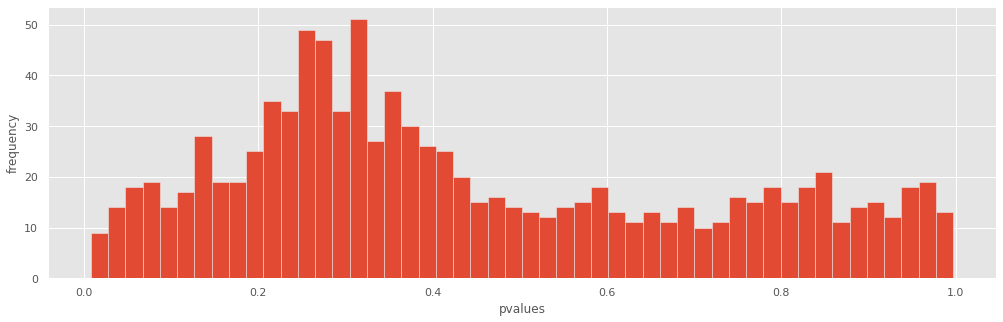

In [214]:
simulations = 1000 # число симуляций
n_s = 50 # число элементов, берущихся из выборки для проведения единичного t теста
res = []
lower_treshhold = 0

d0 = df.query('data == "control_1" and total_revenue > 0').total_revenue
d1 = df.query('data == "control_2" and total_revenue > 0').total_revenue

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = d0.sample(n_s, replace=False).values
    s2 = d1.sample(n_s, replace=False).values
    res.append(stats.ttest_ind(s1, s2, equal_var=False)[1]) # сохраняем pvalue
    if stats.ttest_ind(s1, s2, equal_var=False)[1] < 0.05:
        lower_treshhold += 1

plt.hist(res, bins=50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')

plt.show()

In [215]:
# Проверяем, что количество ложноположительных случаев не превышает альфа = 0.05
lower_treshhold / simulations  # доля p значений менее 0.05 

0.027

In [216]:
print('ARPPU control_1 =', round(df.query('data == "control_1" and total_revenue > 0').total_revenue.mean(), 3))

ARPPU control_1 = 13444.099


In [217]:
print('ARPPU control_2 =', round(df.query('data == "control_2" and total_revenue > 0').total_revenue.mean(), 3))

ARPPU control_2 = 10245.968


**Вывод:** Таким образом можно сделать вывод, что система сплитования работает исправно, так как в данныъ отстутствует дисбаланс

**3. Конверсия пользователя с бесплатной подпиской в вользователя с премиум аккаунтом**

In [218]:
wer= pd.crosstab(df[df['data'] != 'test'].type_type, df[df['data'] != 'test'].data)
wer

data,control_1,control_2
type_type,,
bought,179,173
free,3884,3829
probe,256,236


In [219]:
g, p, dof, expctd = chi2_contingency(wer)
p

0.7630804497706578

Таким образом, нельзя отклонить 0 гипотезу об отсутствии влияния контрольных выборок на конверсии. То есть для обоих групп contol_1 и control_2 разница между конверсиями статистически незначимая

In [220]:
x = round(179 / (3884 + 179 + 256) * 100, 3)
print('Конверсия для группы control_1 равна:', x, '%')

Конверсия для группы control_1 равна: 4.144 %


In [221]:
x_2 = round(173 / (3829 + 173 + 236) * 100, 3)
print('Конверсия для группы control_1 равна:', x_2, '%')

Конверсия для группы control_1 равна: 4.082 %


Конверсия пользователя пробной премиум-подписки в пользователя премиум-аккаунта

In [222]:
x = round(256 / (179 + 256) * 100, 3)
print('Конверсия для группы control_1 равна:', x, '%')

Конверсия для группы control_1 равна: 58.851 %


In [223]:
x_2 = round(236 / (173 + 236) * 100, 3)
print('Конверсия для группы control_1 равна:', x_2, '%')

Конверсия для группы control_1 равна: 57.702 %


# Проведение А\В теста

Так как в результате проверки системы сплитования, мы не выявили не корректного формирования контрольных групп и статистичиеки значимой разници между ними, мы можем при проведении A/B - теста использовать только 1 группу

Посмотрим на распределение total_revenue по группам

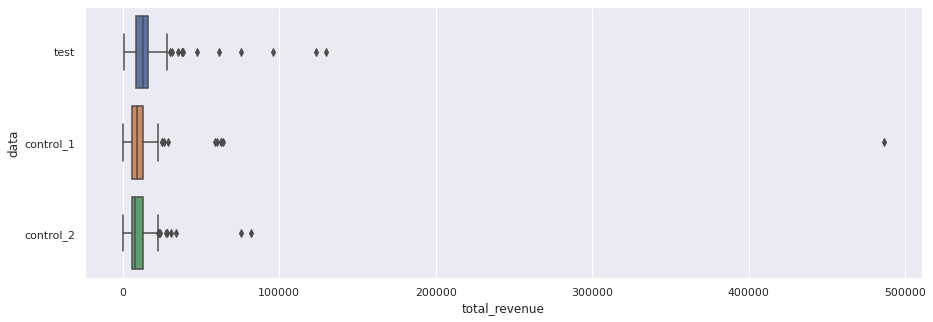

In [224]:
sns.set(rc={'figure.figsize': (15, 5)})
sns.boxplot(data=df.query('total_revenue > 0'), x="total_revenue", y="data")

## Проведем A/B тест групп test/control_1

### 1.ARPU (Average revenue per user) - средняя нормированная выручка на одного пользователя:


In [225]:
# Проверим на нормальность распределения трат для test и control_1.
stat, p = shapiro(df.query('data == "test"').total_revenue.sample(n=1000, random_state=42))
print('stat = %.3f, p = %.3f' % (stat, round(p,4)))
if p > 0.05:
    print("Данные трат для А распределены по нормальному распределению")
else:
    print("Данные трат для A распределены не по нормальному распределению")

stat = 0.110, p = 0.000
Данные трат для A распределены не по нормальному распределению


In [226]:
stat, p = shapiro(df.query('data == "control_1"').total_revenue.sample(n=1000, random_state=42))
print('stat = %.3f, p = %.3f' % (stat, round(p,4)))
if p > 0.05:
    print("Данные трат для test распределены по нормальному распределению")
else:
    print("Данные трат для test распределены не по нормальному распределению")

stat = 0.033, p = 0.000
Данные трат для test распределены не по нормальному распределению


Посмотрим на распределение средних значений в сравниваемых группах, путем многократного извлечения выборок и нахождения среднего

In [227]:
# Посмотрим на распределение средних значений в тартах для польpователей в группе test
stats_mean = []
n = 1000
for i in range(n):
    df_sample = np.random.choice(df.query('data == "test" and total_revenue < 100000').total_revenue, 100, False)
    stats_mean.append(df_sample.mean())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


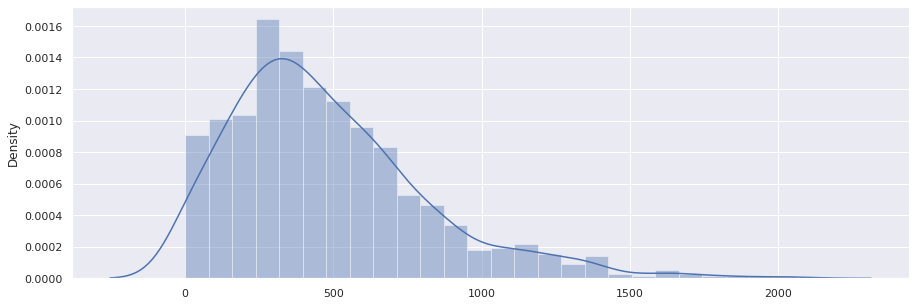

In [228]:
sns.distplot(stats_mean)

In [229]:
# Посмотрим на распределение средних значений в тартах для польхователей в группе control_1
stats_mean_2 = []
n = 1000
for i in range(n):
    df_sample = np.random.choice(df.query('data == "control_1" and total_revenue < 100000').total_revenue, 100, False)
    stats_mean_2.append(df_sample.mean())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


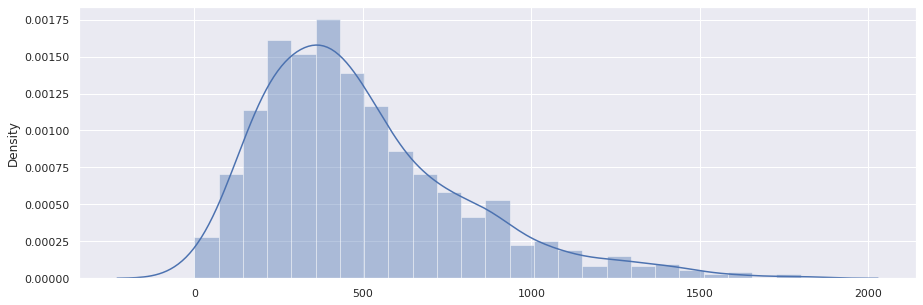

In [230]:
sns.distplot(stats_mean_2)

Можно сделать вывод, что среднее значение в группах распределенны нормально

**ВЫВОД:** Распределения total_revenue по выборкам не являются нормальными, дисперсии являются негомогенными, распределение средних значений является нормальным. Поэтому для данной задачи по оценке статистической значимости различий среднего total_revenue можно использовать метод T-тест, так как основное требование к применению т-теста - это нормальность распределения среднего.


 H0 - изменение цены подписки в двух новых платежных системах не влияет на среднюю выручку на одного пользователя  
 H1 - влияние имеется.

In [231]:
df.query('data != "control_2"').groupby('data').agg({'total_revenue': 'mean'}).rename(columns={'total_revenue': 'ARPU'})

,ARPU
data,
control_1,597.653855
test,536.342074


In [232]:
rvs_1 = df.query('data == "control_1" and total_revenue < 100000').total_revenue
rvs_2 = df.query('data == "test" and total_revenue < 100000').total_revenue
stats.ttest_ind(rvs_1, rvs_2)

Ttest_indResult(statistic=0.11282712393588963, pvalue=0.9101702518624388)

Полученный результат говорит о том, что данные не различаются статистически значимо.  
pvalue > 0.05  
Принимаем нулевую гипотезу

## 2.ARPPU (Average revenue per paying user) - средняя выручка на одного платящего пользователя

 Проверим на нормальность распределения трат платящих юзеров.

In [233]:
stat, p = shapiro(df.query('data == "control_1" and total_revenue > 0').total_revenue)
print('stat = %.3f, p = %.3f' % (stat, round(p,4)))
if p > 0.05:
    print("Данные трат для control_1 имеют нормальное распределение ")
else:
    print("Данные трат для control_1 имеют не нормальное распределение")

stat = 0.175, p = 0.000
Данные трат для control_1 имеют не нормальное распределение


In [234]:
stat, p = shapiro(df.query('data == "test" and total_revenue > 0').total_revenue)
print('stat = %.3f, p = %.3f' % (stat, round(p,4)))
if p > 0.05:
    print("Данные трат для test имеют нормальное распределение ")
else:
    print("Данные трат для test имеют не нормальное распределение")

stat = 0.551, p = 0.000
Данные трат для test имеют не нормальное распределение


Посмотрим на распределение средних значений в сравниваемых группах, путем многократного извлечения выборок и нахождения среднего

In [235]:
# Посмотрим на распределение средних значений в тартах для польхователей в группе control_1
stats_mean_3 = []
n = 1000
for i in range(n):
    df_sample = np.random.choice(df.query('data == "control_1" and 0 < total_revenue < 100000').total_revenue, 100, False)
    stats_mean_3.append(df_sample.mean())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


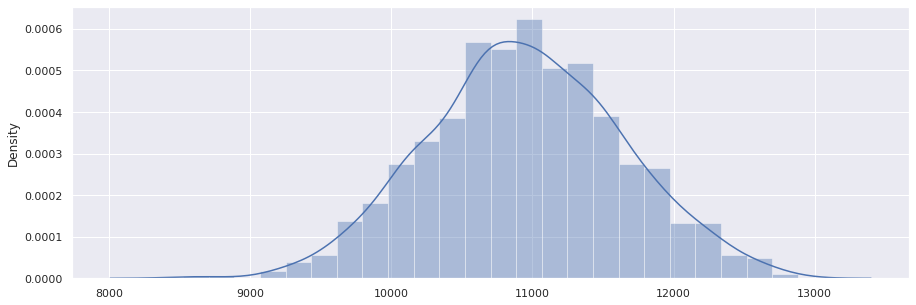

In [236]:
sns.distplot(stats_mean_3)

In [237]:
# Посмотрим на распределение средних значений в тартах для польхователей в группе test
stats_mean_4 = []
n = 1000
for i in range(n):
    df_sample = np.random.choice(df.query('data == "control_1" and 0 < total_revenue < 100000').total_revenue, 100, False)
    stats_mean_4.append(df_sample.mean())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


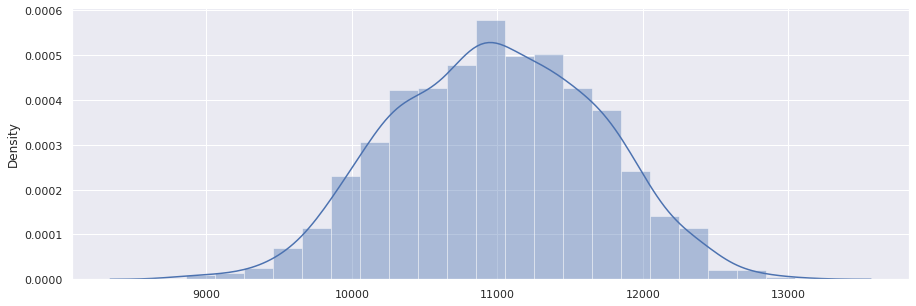

In [238]:
sns.distplot(stats_mean_4)

Можно сделать вывод, что среднее значение в группах распределенны нормально

**ВЫВОД:** Распределения total_revenue по выборкам не являются нормальными, дисперсии являются негомогенными, распределение средних значений является нормальным. Поэтому для данной задачи по оценке статистической значимости различий среднего total_revenue можно использовать метод T-тест, так как основное требование к применению т-теста - это нормальность распределения среднего.


 H0 - изменение цены подписки в двух новых платежных системах не влияет на среднюю выручку на одного пользователя  
 H1 - влияние имеется.

In [239]:
df.query('data != "control_2" and total_revenue > 0').groupby('data').agg({'total_revenue': 'mean'}).rename(columns={'total_revenue': 'ARPPU'})

,ARPPU
data,
control_1,13444.098958
test,15798.048276


In [240]:
rvs_1 = df.query('data == "control_1" and 0 < total_revenue < 100000').total_revenue
rvs_2 = df.query('data == "test" and 0 < total_revenue < 100000').total_revenue
stats.ttest_ind(rvs_1, rvs_2)

Ttest_indResult(statistic=-2.661999712501557, pvalue=0.008145765757597623)

Полученный результат говорит о том, что данные различаются статистически значимо.  
pvalue > 0.05  
Отклоняем нулевую гипотезу

## 3. Конверсия пользователя с бесплатной подпиской в обладателя платного премиум-аккаунта и конверсия пользователя из владельца пробной подписки в обладателя платной подписки премиум аккаунта

1) Конверсия пользователя с бесплатной подпиской в обладателя платного премиум-аккаунта:

In [241]:
df_1 = df.query('data != "control_2"')

In [242]:
df_1['user_type'] = df_1['type_type']\
    .apply(lambda x: 'free+probe' if x != 'bought' else 'bought')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [243]:
tabAB= pd.crosstab(df_1.user_type, df_1.data)
tabAB

data,control_1,test
user_type,,
bought,179,139
free+probe,4140,4132


In [244]:
g, p, dof, expctd = chi2_contingency(tabAB)
print('р уровень значимости равен:', p, ', то есть р < 0.05')

р уровень значимости равен: 0.033408281158805585 , то есть р < 0.05


Таким образом, мы определили, что при изменении цены подписки на премиум аккаунт конверсия пользователя с бесплатной подпиской в обладателя платного премиум-аккаунта именилась статистически существенно. (а именно - уменьшилась)

2) Конверсия пользователя из владельца пробной подписки в обладателя платной подписки премиум аккаунта:

In [245]:
tabAB2= pd.crosstab(df_1.query('type_type != "free"').user_type, df_1.query('type_type != "free"').data)
tabAB2

data,control_1,test
user_type,,
bought,179,139
free+probe,256,266


In [246]:
g, p, dof, expctd = chi2_contingency(tabAB2)
print('р уровень значимости равен:', p, ', то есть р < 0.05')

р уровень значимости равен: 0.049106725574160834 , то есть р < 0.05


Таким образом, мы определили, что при изменении цены подписки на премиум аккаунт конверсия пользователя из владельца пробной подписки в обладателя платной подписки премиум аккаунта изменилась статистически значимо. (а именно - уменьшилась)

**Вывод:** В результате проведенного исследования можно сдлеать вывод, что изменение цены на подписку смогло только статистически 
значимо повысить среднюю выручку на одного платящего пользователя ARPPU (Average revenue per paying user).

По моему мнению эксперимент можно считать неуспешным. Так как повышение цены смогло привести к доходности от и так 
платящих пользователей. А основной задачей такой компании должна стоять цель, такая как привлечение новых пользователей на покупку платной подписки.  
Так же при исследовании мы выявили, что после изминения цены доля людей, продлевающих пробную подписку, статистически значимо снизилась.

    